<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%2011/Assignment%2011%20Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 11/asgnmt11')

# os.chdir(r'/content')
# !git clone https://github.com/jai2shan/TSAI-EVA40-Assignments.git
!git pull origin master
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 11/asgnmt11')

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/jai2shan/TSAI-EVA40-Assignments
 * branch            master     -> FETCH_HEAD
   14f4c82..784caac  master     -> origin/master
Updating 14f4c82..784caac
Fast-forward
 Session 11/asgnmt11/LR_Min_Max.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [2]:
from torchvision import transforms
from DataLoader import cifar_data_loader,View_images
import torch
from torchsummary import summary
from assignment11_model_DropOut import Net

from LR_Finder_acc import *
from LR_Min_Max import *
from Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from ModelPerformance import *
from gradcam import GradCamDisplay
import PIL
from gradcam import *
import copy

In [3]:
### Data Loading
trainloader,testloader = cifar_data_loader(BatchSize=512)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

net = Net().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

## Estimating LR Max


Learning rate search finished. See the graph with {finder_name}.plot()


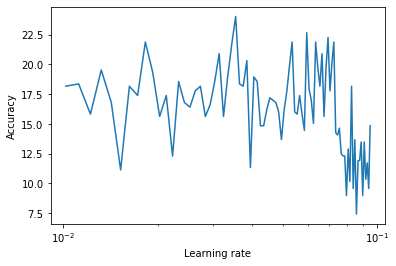

35    0.035418
Name: lr, dtype: float64

In [5]:
lr_max = LR_Max(net,trainloader,start = 1e-4,end = 0.1,iters = 100,mode = 'linear')
lr_max

## Estimating LR Min


In [6]:

lr_min =  LR_Min(trainloader,lr_max)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.7630012035369873 Batch_id=97 Accuracy=23.05: 100%|██████████| 98/98 [00:36<00:00,  2.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.5261164903640747 Batch_id=97 Accuracy=37.90: 100%|██████████| 98/98 [00:37<00:00,  2.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.4660844802856445 Batch_id=97 Accuracy=46.52: 100%|██████████| 98/98 [00:36<00:00,  2.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.2541300058364868 Batch_id=97 Accuracy=52.80: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.2143768072128296 Batch_id=97 Accuracy=56.66: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.5852761268615723 Batch_id=97 Accuracy=31.36: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.2584882974624634 Batch_id=97 Accuracy=46.34: 100%|██████████| 98/98 [00:36<00:00,  2.66it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.229335069656372 Batch_id=97 Accuracy=53.05: 100%|██████████| 98/98 [00:36<00:00,  2.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.0832947492599487 Batch_id=97 Accuracy=57.34: 100%|██████████| 98/98 [00:37<00:00,  2.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.1499923467636108 Batch_id=97 Accuracy=61.67: 100%|██████████| 98/98 [00:36<00:00,  2.66it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.6932570934295654 Batch_id=97 Accuracy=28.07: 100%|██████████| 98/98 [00:36<00:00,  2.66it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.3914930820465088 Batch_id=97 Accuracy=45.07: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.3178937435150146 Batch_id=97 Accuracy=51.83: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.1817209720611572 Batch_id=97 Accuracy=56.43: 100%|██████████| 98/98 [00:37<00:00,  2.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.0770390033721924 Batch_id=97 Accuracy=60.45: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.856123447418213 Batch_id=97 Accuracy=24.53: 100%|██████████| 98/98 [00:37<00:00,  2.61it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.4770818948745728 Batch_id=97 Accuracy=40.22: 100%|██████████| 98/98 [00:37<00:00,  2.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.4086098670959473 Batch_id=97 Accuracy=47.40: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.3177158832550049 Batch_id=97 Accuracy=52.87: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.2632129192352295 Batch_id=97 Accuracy=57.41: 100%|██████████| 98/98 [00:37<00:00,  2.61it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.5762856006622314 Batch_id=97 Accuracy=32.84: 100%|██████████| 98/98 [00:37<00:00,  2.58it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.4504636526107788 Batch_id=97 Accuracy=46.91: 100%|██████████| 98/98 [00:38<00:00,  2.57it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.1609148979187012 Batch_id=97 Accuracy=53.33: 100%|██████████| 98/98 [00:37<00:00,  2.60it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.2625491619110107 Batch_id=97 Accuracy=57.68: 100%|██████████| 98/98 [00:37<00:00,  2.60it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.0044420957565308 Batch_id=97 Accuracy=61.10: 100%|██████████| 98/98 [00:37<00:00,  2.60it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.5970697402954102 Batch_id=97 Accuracy=31.61: 100%|██████████| 98/98 [00:38<00:00,  2.58it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.3146369457244873 Batch_id=97 Accuracy=47.03: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 2


Loss=1.3273228406906128 Batch_id=97 Accuracy=52.96: 100%|██████████| 98/98 [00:37<00:00,  2.58it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 3


Loss=1.3043910264968872 Batch_id=97 Accuracy=57.29: 100%|██████████| 98/98 [00:37<00:00,  2.60it/s]
  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 4


Loss=1.1334586143493652 Batch_id=97 Accuracy=60.05: 100%|██████████| 98/98 [00:38<00:00,  2.58it/s]


In [7]:
print('LR Min is ',lr_min)


LR Min is  0.005903030303030303


In [8]:
net = Net().to(device)
tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.1, momentum = 0.85,weight_decay = 0.0005)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr = lr_max.values[0], 
                                          pct_start = 5/24, # 5/24
                                          epochs =24,
                                          steps_per_epoch=len(trainloader),
                                          div_factor = lr_max.values[0]/lr_min,
                                          final_div_factor = 1)

# net = Net().to(device)
for epoch in range(24):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
    acc = tt.test_(net, device, testloader)  
    scheduler.step()
       
print('Finished Training')

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.7421021461486816 Batch_id=97 Accuracy=25.28: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.7110, Accuracy: 3945/10000 (39.45%)

EPOCH: 1


Loss=1.491591453552246 Batch_id=97 Accuracy=39.74: 100%|██████████| 98/98 [00:37<00:00,  2.61it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.4108, Accuracy: 4907/10000 (49.07%)

EPOCH: 2


Loss=1.2566941976547241 Batch_id=97 Accuracy=48.26: 100%|██████████| 98/98 [00:37<00:00,  2.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.2937, Accuracy: 5492/10000 (54.92%)

EPOCH: 3


Loss=1.204400897026062 Batch_id=97 Accuracy=53.80: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.1409, Accuracy: 6036/10000 (60.36%)

EPOCH: 4


Loss=0.9993976354598999 Batch_id=97 Accuracy=57.60: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9791, Accuracy: 6566/10000 (65.66%)

EPOCH: 5


Loss=1.153809905052185 Batch_id=97 Accuracy=60.30: 100%|██████████| 98/98 [00:37<00:00,  2.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8640, Accuracy: 7018/10000 (70.18%)

EPOCH: 6


Loss=0.9438807964324951 Batch_id=97 Accuracy=64.04: 100%|██████████| 98/98 [00:36<00:00,  2.69it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8284, Accuracy: 7139/10000 (71.39%)

EPOCH: 7


Loss=0.9785649180412292 Batch_id=97 Accuracy=67.08: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7176, Accuracy: 7566/10000 (75.66%)

EPOCH: 8


Loss=0.8605343103408813 Batch_id=97 Accuracy=68.24: 100%|██████████| 98/98 [00:36<00:00,  2.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6709, Accuracy: 7677/10000 (76.77%)

EPOCH: 9


Loss=0.8145963549613953 Batch_id=97 Accuracy=69.99: 100%|██████████| 98/98 [00:38<00:00,  2.56it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6464, Accuracy: 7833/10000 (78.33%)

EPOCH: 10


Loss=0.8791669011116028 Batch_id=97 Accuracy=70.97: 100%|██████████| 98/98 [00:37<00:00,  2.61it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6303, Accuracy: 7917/10000 (79.17%)

EPOCH: 11


Loss=0.7176602482795715 Batch_id=97 Accuracy=72.10: 100%|██████████| 98/98 [00:37<00:00,  2.60it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5711, Accuracy: 8052/10000 (80.52%)

EPOCH: 12


Loss=0.7683530449867249 Batch_id=97 Accuracy=73.21: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6256, Accuracy: 7948/10000 (79.48%)

EPOCH: 13


Loss=0.796691358089447 Batch_id=97 Accuracy=74.14: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5235, Accuracy: 8205/10000 (82.05%)

EPOCH: 14


Loss=0.7778118848800659 Batch_id=97 Accuracy=74.69: 100%|██████████| 98/98 [00:36<00:00,  2.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5254, Accuracy: 8282/10000 (82.82%)

EPOCH: 15


Loss=0.7759482860565186 Batch_id=97 Accuracy=76.22: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5211, Accuracy: 8161/10000 (81.61%)

EPOCH: 16


Loss=0.6193616986274719 Batch_id=97 Accuracy=76.55: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5390, Accuracy: 8225/10000 (82.25%)

EPOCH: 17


Loss=0.6407198905944824 Batch_id=97 Accuracy=76.85: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4609, Accuracy: 8414/10000 (84.14%)

EPOCH: 18


Loss=0.6148585081100464 Batch_id=97 Accuracy=77.79: 100%|██████████| 98/98 [00:37<00:00,  2.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4430, Accuracy: 8497/10000 (84.97%)

EPOCH: 19


Loss=0.6285406947135925 Batch_id=97 Accuracy=77.90: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4436, Accuracy: 8492/10000 (84.92%)

EPOCH: 20


Loss=0.6855982542037964 Batch_id=97 Accuracy=78.74: 100%|██████████| 98/98 [00:37<00:00,  2.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4706, Accuracy: 8457/10000 (84.57%)

EPOCH: 21


Loss=0.6318220496177673 Batch_id=97 Accuracy=79.16: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4931, Accuracy: 8328/10000 (83.28%)

EPOCH: 22


Loss=0.6996766328811646 Batch_id=97 Accuracy=79.33: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4504, Accuracy: 8458/10000 (84.58%)

EPOCH: 23


Loss=0.6349998712539673 Batch_id=97 Accuracy=79.91: 100%|██████████| 98/98 [00:37<00:00,  2.62it/s]



Test set: Average loss: 0.4047, Accuracy: 8654/10000 (86.54%)

Finished Training


In [9]:
5/24

0.20833333333333334